## Data Science Project: Individual Planning Stage
##### Cayley Dawson, DSCI 100 Section 004
##### GitHub Repository Link: https://github.com/cdawson07/dsci_project

In [76]:
library(tidyverse)
library(repr)
library(tidymodels)

In [77]:
options(repr.matrix.max.rows = 6)
# load data from GitHub URL (absolute path) 
players_data <- read_csv("https://raw.githubusercontent.com/cdawson07/dsci_project/refs/heads/main/players.csv")
players_data
sessions_data <- read_csv("https://raw.githubusercontent.com/cdawson07/dsci_project/refs/heads/main/sessions.csv")
sessions_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


### Data Description 

For this project, we are analyzing data from the UBC Computer Science Department, which is conducting research into how individuals play video games. Specifically, they are collecting data on study participants playing Minecraft. We have two datasets: players_data (which contains data about each player), and sessions_data (which contains data about which player is playing at what time). 

**Players Data (players_data, 196 Observations x 7 Variables)**

players_data is a dataset that contains 196 observations and 7 variables. Most of the data is self-reported from a survey that players fill out before they are given access to the Minecraft Server. Other data (specifically hashedEmail and played_hours) is either assigned to the players or is data that was collected on them once they began playing on the Minecraft server.

Description of each variable: 
- experience (character) 
    - one of Amateur, Beginner, Regular, Veteran, and Pro. 
    - indicates what level a player plays at 
- subscribe (logical) 
    - True or False
    - indicates whether a player is subscribed to a game-related newsletter (True) or not (False). 
- hashedEmail (character) 
    - a unique, randomly generated string of characters assigned to each player in order to keep track of an individual player anonymously. 
- played_hours (double) 
    - amount of hours spent playing on the minecraft server.  
- name (character) 
    - the name of the player  
- gender (character) 
    - one of Male, Female, Non-binary, Two-Spirited, Agender, Prefer not to say, and Other. 
    - the gender identity of the player
- Age (double) 
    - the age of the player in years

In [78]:
# find the mean values of all numerical variables in the players_data dataset 
players_mean_values <- players_data |> 
    select(played_hours, Age) |> 
    summarize(played_hours_avg = mean(played_hours), age_avg = mean(Age, na.rm = TRUE))
players_mean_values

played_hours_avg,age_avg
<dbl>,<dbl>
5.845918,21.13918


**Sessions Data (sessions_data, 1535 Observations x 5 Variables)**

sessions_data is a dataset that contains 1535 observations and 5 variables. This data consists of the player's hashed email (same as the hashed email in the Players dataset), and data about when the player began and ended playing on the server. 

Description of each variable: 
- hashedEmail (character) 
    - a unique, randomly generated string of characters assigned to each player in order to keep track of an individual player anonymously. (same as players_data)
- start_time (character)
    - the date (dd/mm/yyyy) and time (hr:min) that the player started playing 
- end_time (character)
    - the date (dd/mm/yyyy) and time (hr:min) that the player stopped playing
- original_start_time (double)
    - a unix timestamp (numerical representation) of the start time  
- original_end_time (double)
    - a unix timestamp (numerical representation) of the end time

**Comments on the Data**

The players_data dataset appears to be quite tidy, since each row contains a single observation, each column contains a single variable, and there is no more than one value represented in each cell. However, the sessions_data dataset is not tidy, specifically in the start_time and end_time columns, since each cell contains multiple pieces of data. There are two ways that this can be split up: date (dd/mm/yyyy) and time (hr:min), or into day, month, year, hour, and minute. For the purpose of answering questions regarding what times are most popular for players to be playing on the server, it would be beneficial to include what day of the week a player is playing on the server. However, since an exact date is provided, people analyzing the data would be able to figure that out themselves. 

It would also be beneficial to have a better understanding of how the data is collected (specifically from the players_data). From visiting the website where you can sign up to participate in the study, we can discern that there is a survey and that some of the data in the players dataset is self-reported. However, we as the data scientists analyzing the data are not given the survey, so we do not know what specifically was self-reported, and what was found or assigned a different way. Some pieces of data, such as gender identity, are easy to assume has been self-reported. However, other pieces of data, such as age and name, are unclear as to whether they were self-reported or obtained/assigned another way (i.e. Were the names randomly assigned by the people conducting research for the sake of anonymity? Was the age of the player self-reported, or obtained from their email address?). It would also be nice to have a description provided of what each category of experience means (ex. a ranking of most to least or a description of what it means to be an amateur versus a beginner). 

### Questions

**Broad Question:**

Question 3. We are interested in demand forecasting, namely, what time windows are most likely to have large number of simultaneous players. This is because we need to ensure that the number of licenses on hand is sufficiently large to accommodate all parallel players with high probability. 

**Specific Question:**

Using data from the sessions_data dataset, when grouping by individual days, what time of day are the most individual players playing? 

In order to answer this specific question, the data in the sessions_data dataset needs to be tidied. For my purposes, I would separate the start_time and end_time columns into two variables each: the start/end date (dd/mm/yyyy) and the start/end time (hr:min). I am able to keep the date containing day, month, and year because my question does not have to do with any of those as individual values. 

In [79]:
# tidy sessions_data by splitting start_time into start_date and start_time, 
# as well as splitting end_time into end_date and end_time

initial_split_sessions_data <- sessions_data |> 
    separate(col = start_time,
             into = c("start_date", "start_time"),
             sep = " ") |>  
    separate(col = end_time, 
            into = c("end_date", "end_time"), 
            sep = " ")

# tidy again by splitting start_time into start_hour and start_min, 
# as well as splitting end_time into end_hour and end_min

tidy_sessions_data <- initial_split_sessions_data |> 
    separate(col = start_time,
             into = c("start_hour", "start_min"),
             sep = ":") |>  
    separate(col = end_time, 
            into = c("end_hour", "end_min"), 
            sep = ":")
tidy_sessions_data

hashedEmail,start_date,start_hour,start_min,end_date,end_hour,end_min,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18,12,30/06/2024,18,24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23,33,17/06/2024,23,46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17,34,25/07/2024,17,57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024,15,36,28/07/2024,15,57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024,06,15,25/07/2024,06,22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024,02,26,20/05/2024,02,45,1.71617e+12,1.71617e+12


### Exploratory Visualization

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


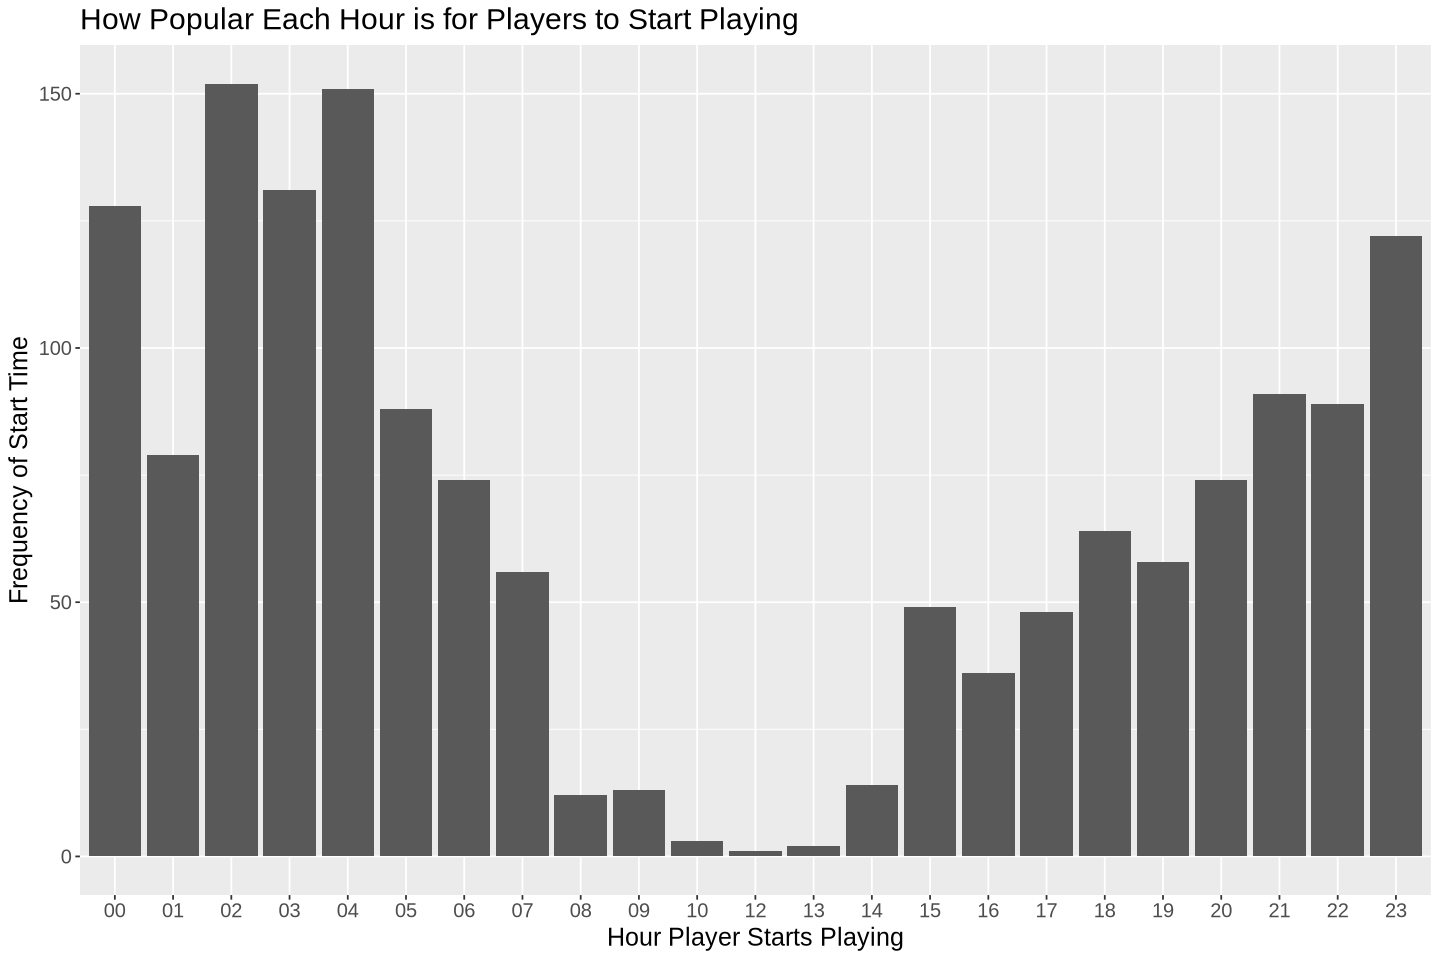

In [80]:
options(repr.plot.height = 8, repr.plot.width = 12)
# plot the hour in which players start playing 
start_time_plot <- ggplot(tidy_sessions_data, aes(x = start_hour)) + 
    geom_histogram(stat = "count") + 
    labs(x = "Hour Player Starts Playing", y = "Frequency of Start Time") + 
    theme(text = element_text(size = 15)) + 
    ggtitle("How Popular Each Hour is for Players to Start Playing")
start_time_plot

This plot is very useful to see preliminarily what times of day are most popular for players to play during. This is useful information which can guide how I perform my analysis later on, since it gives me an idea of which time of day is most popular. However, there are still other parts of the data that are relevant (such as how many players are active at the same time) and that I will factor in when I am performing my full analysis. 

### Methods and Plan

I would use a knn-regression on the sessions_data dataset to perform my analysis to answer my question. I am choosing to use the sessions datasest because it contains play time data that is pertinent to the question I am trying to answer. The knn-regression model type is the appropriate model because I am trying to predict time, which is a numerical variable. An assumption that I am making is that the data will not be linear (for example, because there could be multiple peak play times in a day), and therefore a knn-regresssion would suit my data better than a linear regression would. However, if I find that the data is linear, then I would want to use a linear regression instead. One downside of using a knn-regression is that I will need to standardize my data. I will also have to test many k values to determine which one creates the optimal regression model. I am planning to split my data into 75% training and 25% testing, and I will perform a 5-fold cross validation on the training data. I will split my data into training and testing after I tidy and wrangle my data, but before I train my model. 